# Text

## Objectives

- [ ] String indexing and immutability
- [ ] The `string` module
- [ ] Manipulating text strings
- [ ] Formatting text strings
- [ ] Text I/O
- [ ] Working with Unicode
- [ ] Regular expressions
- [ ] Text to arrays

## Strings

- Point index
- Interval index
- Negative index
- Stride
- Reversing a string
- Strings are immutable


### References

- [String formats](https://docs.python.org/3.7/library/string.html)
- [String methods](https://docs.python.org/3.7/library/stdtypes.html#string-methods)
- [Regular expressions](https://docs.python.org/3.7/library/re.html)
- [File I/O](https://docs.python.org/3.7/library/io.html#io-overview)

In [58]:
s = "hello world"

In [59]:
s

'hello world'

In [60]:
s[0], s[6]

('h', 'w')

In [61]:
s[0:6]

'hello '

In [62]:
s[-1], s[-3]

('d', 'r')

In [63]:
s[:]

'hello world'

In [64]:
s[::2]

'hlowrd'

In [65]:
s[::-1]

'dlrow olleh'

In [66]:
x = list('abcd')

In [67]:
x

['a', 'b', 'c', 'd']

In [68]:
x[::-2]

['d', 'b']

In [69]:
x = ['hello', 123]

In [70]:
x[::-1]

[123, 'hello']

In [71]:
x

['hello', 123]

Lists are mutable.

In [72]:
x[0] = 'z'
x

['z', 123]

Strings are immutable.

In [73]:
s[0] = 'H'

TypeError: 'str' object does not support item assignment

In [75]:
try:
    s[0] = 'H'
except TypeError as e:
    print(e)

'str' object does not support item assignment


## The `string` module

- String constants
- String `capwords`

In [76]:
import string

In [77]:
string.digits

'0123456789'

In [78]:
string.ascii_letters

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [79]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [80]:
string.whitespace

' \t\n\r\x0b\x0c'

In [81]:
string.printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

### Orphan function in strings module

In [82]:
string.capwords(s)

'Hello World'

## String methods

### Methods to change case

In [83]:
s

'hello world'

In [84]:
s.capitalize?

Signature: s.capitalize()
Docstring:
Return a capitalized version of the string.

More specifically, make the first character have upper case and the rest lower
case.
Type:      builtin_function_or_method


In [85]:
s.upper()

'HELLO WORLD'

In [86]:
s.lower()

'hello world'

In [87]:
'ß'.casefold()

'ss'

In [88]:
s.capitalize()

'Hello world'

In [89]:
s.title()

'Hello World'

Difference between `title` method and `capwords` function

In [90]:
'hello:world'.title()

'Hello:World'

In [91]:
string.capwords('hello:world')

'Hello:world'

In [92]:
string.capwords('hello:world', sep=':')

'Hello:World'

### String predicates

A predicate is a function that reutrns True of False.

In [93]:
s.isalnum()

False

In [94]:
s.isalpha()

False

In [95]:
s.isnumeric()

False

In [96]:
s.isidentifier()

False

In [97]:
s.isprintable()

True

In [98]:
s.startswith('hell')

True

In [99]:
s.endswith('ld')

True

### Searching and counting

In [100]:
'llo' in s

True

In [101]:
'foo' in s

False

In [102]:
s[2:5]

'llo'

In [103]:
s.find('llo')

2

In [104]:
s.index('llo')

2

In [105]:
s.index('foo')

ValueError: substring not found

In [106]:
s.find('foo')

-1

In [107]:
try:
    s.index('foo')
except ValueError as e:
    print(e)

substring not found


In [108]:
s.count('l')

3

In [109]:
s.count('ll')

1

### Stripping

In [110]:
'   hello world   '.strip()

'hello world'

In [111]:
'   hello world   '.lstrip()

'hello world   '

In [112]:
'   hello world   '.rstrip()

'   hello world'

### Splitting and joining

In [113]:
s.split()

['hello', 'world']

In [114]:
s.split('l')

['he', '', 'o wor', 'd']

In [115]:
s

'hello world'

In [116]:
'-'.join(s)

'h-e-l-l-o- -w-o-r-l-d'

In [117]:
'-'.join(s.split())

'hello-world'

In [118]:
'l'.join(s.split('l'))

'hello world'

### Translation

In [119]:
'GATTACA'.translate(str.maketrans('ACTG', 'TAGC'))

'CTGGTAT'

In [120]:
'GATTACA'.translate(str.maketrans('', '', 'AC'))

'GTT'

In [121]:
string.ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [122]:
string.ascii_lowercase

'abcdefghijklmnopqrstuvwxyz'

In [123]:
'GATTACA'.translate(str.maketrans(string.ascii_uppercase, string.ascii_lowercase))

'gattaca'

Use translation to remove punctuation.

In [124]:
table = str.maketrans('', '', string.punctuation)
sentence = 'The #$%!! dog ate my homework.'
sentence.translate(table)

'The  dog ate my homework'

### `ord` and `chr`

In [125]:
ord('A'), ord('a')

(65, 97)

In [126]:
chr(65), chr(97)

('A', 'a')

In [127]:
chr(ord('B') + (ord('a') - ord('A')))

'b'

## Formatting strings

### C sytle formatting

Using f-strings is preferred — this is a legacy style.

In [128]:
pi = 3.141592653589793
r = 2

In [129]:
'area = %f * %d^2' % (pi, r)

'area = 3.141593 * 2^2'

Precision and padding

In [130]:
'area = %8.2f * %03d^2' % (pi, r)

'area =     3.14 * 002^2'

Right align string

In [131]:
'%10s = %8.2f * %03d^2' % ('area', pi, r)

'      area =     3.14 * 002^2'

Left align string

In [132]:
'%-10s = %8.2f * %03d^2' % ('area', pi, r)

'area       =     3.14 * 002^2'

### Using the `format` method

```python
"{" [field_name] ["!" conversion] [":" format_spec] "}"
```

In [134]:
'{big:,}'.format(big=int(1e9))

'1,000,000,000'

In [135]:
'{pct:.1%}'.format(pct=0.5)

'50.0%'

In [136]:
'area = {} * {}^2'.format(pi, r)

'area = 3.141592653589793 * 2^2'

In [137]:
'area = {a} * {b}^2'.format(a=pi, b=r)

'area = 3.141592653589793 * 2^2'

In [138]:
'area = {pi:8,.4} * {r:06d}^2'.format(pi=pi, r=r)

'area =    3.142 * 000002^2'

In [139]:
'{:>10}'.format('area')

'      area'

In [140]:
'{:<10}'.format('area')

'area      '

In [141]:
'{:^10}'.format('area')

'   area   '

In [142]:
'{:=^10}'.format('area')

'===area==='

In [143]:
import datetime

now = datetime.datetime.now()
'{:%a, %d %b %Y: %H:%M %p}'.format(now)

'Sun, 23 Jul 2023: 09:40 AM'

In [144]:
now

datetime.datetime(2023, 7, 23, 9, 40, 21, 208669)

### Using f strings

In [145]:
f'area = {pi} * {r}^2'

'area = 3.141592653589793 * 2^2'

In [146]:
x = 'area'
f'{x:=^10}'

'===area==='

### Templates (SKIP)

In [ ]:
from string import Template

In [ ]:
t = Template("$who likes $what")
items = [('ann', 'Python'), ('bob', 'R'), ('cody', 'C++')]
for name, lang in items:
    print(t.substitute(who=name, what=lang))

In [ ]:
items = [('ann', 'Python'), ('bob', 'R'), ('cody', 'C++')]
for name, lang in items:
    print("{} likes {}".format(name, lang))

In [ ]:
items = [('ann', 'Python'), ('bob', 'R'), ('cody', 'C++')]
for name, lang in items:
    print(f"{name} likes {lang}")

## Encodings

1. There ain't no such thing as plain text
2. Text is composed of
    1. Letters (Platonic ideal)
    2. Code points (an integer)
    3. Encodings (how the integer is written in memory)
3. Python 3 defaults to Unicode UTF-8 encoding (Unicode code points in Python look like `\uxxxx` where `x` is hexadecimal)
4. To see the bytes from an encoding, use the `encode` method
5. To see the letter from bytes, use the `decode` method
6. You can specify the encoding as an optional argument in the `open` function
7. You can use Unicode in variable names

### Unicode strings

In [147]:
print('hello \u732b')

hello 猫


In [148]:
s = '猫'
print(f'hello {s}')

hello 猫


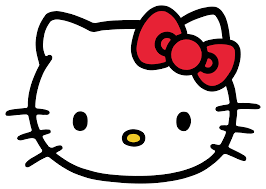

### Byte strings

In [149]:
kitty = '小' + '猫'

In [150]:
print(f'hello {kitty}')

hello 小猫


In [151]:
kitty_bytes = kitty.encode('utf8')
kitty_bytes

b'\xe5\xb0\x8f\xe7\x8c\xab'

In [152]:
kitty_bytes.decode('utf8')

'小猫'

In [153]:
try:
    kitty_bytes.decode('ascii')
except UnicodeDecodeError as e:
    print(e)

'ascii' codec can't decode byte 0xe5 in position 0: ordinal not in range(128)


In [154]:
for suit in '\u2660	\u2665	\u2666	\u2663	\u2664	\u2661	\u2662	\u2667'.split():
    print(suit, end=',')

♠,♥,♦,♣,♤,♡,♢,♧,

### Unicode variable names

In [155]:
αβγδϵ = 23

In [156]:
ΑΒΓΔΕ = 42

In [157]:
(ŷ, ÿ, ỹ, ȳ, y̅, y̆, y̌, y̲) = range(8)

In [158]:
α⃗, α⃖, α⃡, α⃐, α⃑ = range(5)

In [159]:
ℜ = 'real'

### Reading and writing text files

In [160]:
%%file haiku.txt
古池や蛙飛び込む水の音
ふるいけやかわずとびこむみずのおと

Writing haiku.txt


In [161]:
β = 2.3

In [162]:
β

2.3

#### Context manager

A context manager is a class that does some automatic activity on entry and exit. It can be written most easily using a standard library decorator.

In [163]:
class CMDemo:
    """Demo of context manager."""
    
    def __init__(self, name):
        self.name = name
        
    def __enter__(self):
        print("Entering %s" % self.name)
        
    def __exit__(self, *args):
        print("Exiting %s" % self.name)

In [164]:
with CMDemo('foo'):
    print('foo')

Entering foo
foo
Exiting foo


In [165]:
from contextlib import contextmanager

@contextmanager
def tag(name):
    print("<%s>" % name)
    yield
    print("</%s>" % name)

In [166]:
with tag('foo'):
    print('Hello')

<foo>
Hello
</foo>


It is good practice to use `open` as a context manager for file I/O so we don't forget to close it. The old practice looks something like

```python
f = open('foo.txt')
# do stuff with f over many lines
f.close()
```

The trouble is that people forget to close `f` and there are only a finite number of file handlers provided by the operating system, and programs can crash if that number is exceeded.

In [167]:
with open('haiku.txt') as f:
    for line in f:
        print(line, end='')

古池や蛙飛び込む水の音
ふるいけやかわずとびこむみずのおと


In [168]:
with open('haiku.txt') as f:
    haiku = f.read()

In [169]:
haiku

'古池や蛙飛び込む水の音\nふるいけやかわずとびこむみずのおと\n'

In [170]:
haiku.split()

['古池や蛙飛び込む水の音', 'ふるいけやかわずとびこむみずのおと']

In [171]:
with open('haiku_alt.txt', 'w') as f:
    f.write(haiku)

In [172]:
! cat haiku_alt.txt

古池や蛙飛び込む水の音
ふるいけやかわずとびこむみずのおと


## Using regular expressions

- Read [Regular Expression HOWTO](https://docs.python.org/3/howto/regex.html)
- Practice at https://regex101.com
- Play [RegEx Golf](https://alf.nu/RegexGolf)

![golf](https://www.explainxkcd.com/wiki/images/7/7b/regex_golf.png)

In [173]:
import re

### Matching Characters

In [174]:
beer = '''99 bottles of Beer on the wall, 99 bottles of beeR.
Take one down and pass it around, 98 bottles of beer on the wall.'''

In [175]:
re.findall('beer', beer)

['beer']

In [176]:
re.findall('beer', beer, re.IGNORECASE)

['Beer', 'beeR', 'beer']

In [177]:
re.findall('on', beer)

['on', 'on', 'on']

### Alternatives

In [178]:
re.findall('bottles|beer', beer, re.IGNORECASE)

['bottles', 'Beer', 'bottles', 'beeR', 'bottles', 'beer']

### Word boundaries

In [179]:
re.findall(r'\bon\b', beer)

['on', 'on']

In [182]:
re.findall(r'\b..\b', beer)[-10:]

['of', 'on', ', ', '99', 'of', 'it', ', ', '98', 'of', 'on']

### Character sets

In [183]:
re.findall(r'\d', beer)

['9', '9', '9', '9', '9', '8']

In [184]:
re.findall(r'[0-9]', beer)

['9', '9', '9', '9', '9', '8']

In [185]:
re.findall(r'\w', beer)[11:25]

['B', 'e', 'e', 'r', 'o', 'n', 't', 'h', 'e', 'w', 'a', 'l', 'l', '9']

### Repeating Things

In [186]:
re.findall(r'\d+', beer)

['99', '99', '98']

In [187]:
re.findall(r'b.+r', beer)

['bottles of Beer', 'bottles of beer']

In [188]:
re.findall(r'be+', beer)

['bee', 'bee']

In [189]:
re.findall(r'be*', beer)

['b', 'b', 'bee', 'b', 'bee']

In [190]:
re.findall(r'b[aeiou]+', beer)

['bo', 'bo', 'bee', 'bo', 'bee']

In [191]:
re.findall(r'b[aeiou]{2,}', beer)

['bee', 'bee']

In [192]:
re.findall(r'b[aeiou]{1}', beer)

['bo', 'bo', 'be', 'bo', 'be']

### Finding matches

In [193]:
for m in re.finditer('beer', beer, re.IGNORECASE):
    print(m.start(), m.end(), m.span(),  m.group())    

14 18 (14, 18) Beer
46 50 (46, 50) beeR
100 104 (100, 104) beer


In [194]:
beer[14:18]

'Beer'

### Grouping

In [195]:
re.findall(r'(\d+)\s+(\b\w+?\b)', beer, re.IGNORECASE)

[('99', 'bottles'), ('99', 'bottles'), ('98', 'bottles')]

### Splitting

In [196]:
re.split(r'\d+', beer)

['',
 ' bottles of Beer on the wall, ',
 ' bottles of beeR.\nTake one down and pass it around, ',
 ' bottles of beer on the wall.']

### Search and replace

In [197]:
print(re.sub('beer', 'whiskey', beer, flags=re.IGNORECASE))

99 bottles of whiskey on the wall, 99 bottles of whiskey.
Take one down and pass it around, 98 bottles of whiskey on the wall.


In [198]:
print(re.sub(r'(\d+)\s+(\b\w+?\b)', r'\2 \1', beer, re.IGNORECASE))

bottles 99 of Beer on the wall, bottles 99 of beeR.
Take one down and pass it around, 98 bottles of beer on the wall.


### Function versus compiled method

In [199]:
pattern = re.compile(r'(\d+)\s+(\b\w+?\b)')
pattern.findall(beer)

[('99', 'bottles'), ('99', 'bottles'), ('98', 'bottles')]

### Raw strings

The backslash `\` is an escape character in a regular Python string. So we need to escape it to match a literal `\`. However, `\` is an escape character in the regular expression mini-language when compiling the regular expression pattern. So we need to escape at two levels - hence we need `\\\\` to match a literal `\`. The raw string r`foo` treats `\` as a literal character rather than an escape character. 

An alternative is to use raw strings `r'\section'` - raw strings do not treat the backslash as a special character.

In [200]:
latex = 'latex uses \section over and over again like so \section'

In [201]:
re.findall('\section', latex)

[]

In [202]:
re.findall('\\section', latex)

[]

In [203]:
re.findall('\\\\section', latex)

['\\section', '\\section']

In [204]:
re.findall(r'\\section', latex)

['\\section', '\\section']

## Examples

### Removing punctuation

In [205]:
ss = 'What the #$@&%*! does your code mean?'

Using a comprehension

In [207]:
''.join(s for s in ss if not s in string.punctuation)

'What the  does your code mean'

Using a built-in function

In [206]:
ss.translate(str.maketrans('','', string.punctuation))

'What the  does your code mean'

Using a regular expression

In [208]:
pat = re.compile('[%s]' % re.escape(string.punctuation))

In [209]:
pat.sub('', ss)

'What the  does your code mean'

#### Timing

In [210]:
%timeit ''.join(s for s in ss if not s in string.punctuation)

2.17 µs ± 6.51 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [211]:
%timeit ss.translate(str.maketrans('','', string.punctuation))

1.42 µs ± 7.49 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [212]:
%timeit pat.sub('', ss)

675 ns ± 6.73 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


### Custom version of `capwords`

In [213]:
string.capwords('hello    world')

'Hello World'

In [214]:
def my_capwords(ss):
    return ' '.join([s.title() for s in ss.split()])

In [215]:
my_capwords('hello    world')

'Hello World'

### Bag of words

Create a table of counts, where rows represent unique words and columns represent different documents. Ignore case and capitalization.

In [216]:
doc1 = """The wheels on the bus go,
Round and round,
Round and round,
Round and round.
The wheels on the bus go
Round and round,
All through the town."""

doc2 = """The doors on the bus go,
Open and shut,
Open and shut,
Open and shut.
The doors on the bus go
Open and shut,
All through the town."""

doc3 = """The Driver on the bus says,
"Move on back!
Move on back!
Move on back!"
The Driver on the bus says,
"Move on back!"
All through the town."""

doc4 = """The babies on the bus go,
"Wah, wah, wah!
Wah, wah, wah!
Wah, wah, wah!"
The babies on the bus go,
"Wah, wah, wah!"
All through the town."""

In [217]:
docs = [doc1, doc2, doc3, doc4]
doc_words = [doc.strip().lower().translate(str.maketrans('', '', string.punctuation)).split()
             for doc in docs]
words = [word for words in doc_words for word in words]
vocab = set(words)

In [218]:
import numpy as np
import pandas as pd

In [219]:
table = np.zeros((len(vocab), len(docs)), dtype='int')

In [220]:
for i, word in enumerate(vocab):
    for j, doc in enumerate(doc_words):
        table[i, j] = doc.count(word)

In [222]:
table

array([[ 2,  2,  2,  2],
       [ 8,  0,  0,  0],
       [ 4,  4,  0,  0],
       [ 0,  0,  2,  0],
       [ 0,  0,  2,  0],
       [ 1,  1,  1,  1],
       [ 0,  2,  0,  0],
       [ 0,  4,  0,  0],
       [ 2,  2,  0,  2],
       [ 0,  0,  4,  0],
       [ 2,  2,  6,  2],
       [ 1,  1,  1,  1],
       [ 0,  0,  0,  2],
       [ 0,  4,  0,  0],
       [ 5,  5,  5,  5],
       [ 2,  0,  0,  0],
       [ 0,  0,  0, 12],
       [ 1,  1,  1,  1],
       [ 0,  0,  4,  0]])

In [223]:
pd.DataFrame(table, columns='doc1 doc2 doc3 doc4'.split(), index=list(vocab))

,doc1,doc2,doc3,doc4
bus,2,2,2,2
round,8,0,0,0
and,4,4,0,0
says,0,0,2,0
driver,0,0,2,0
all,1,1,1,1
doors,0,2,0,0
open,0,4,0,0
go,2,2,0,2
back,0,0,4,0
